# IPL 2022 Auction Analysis

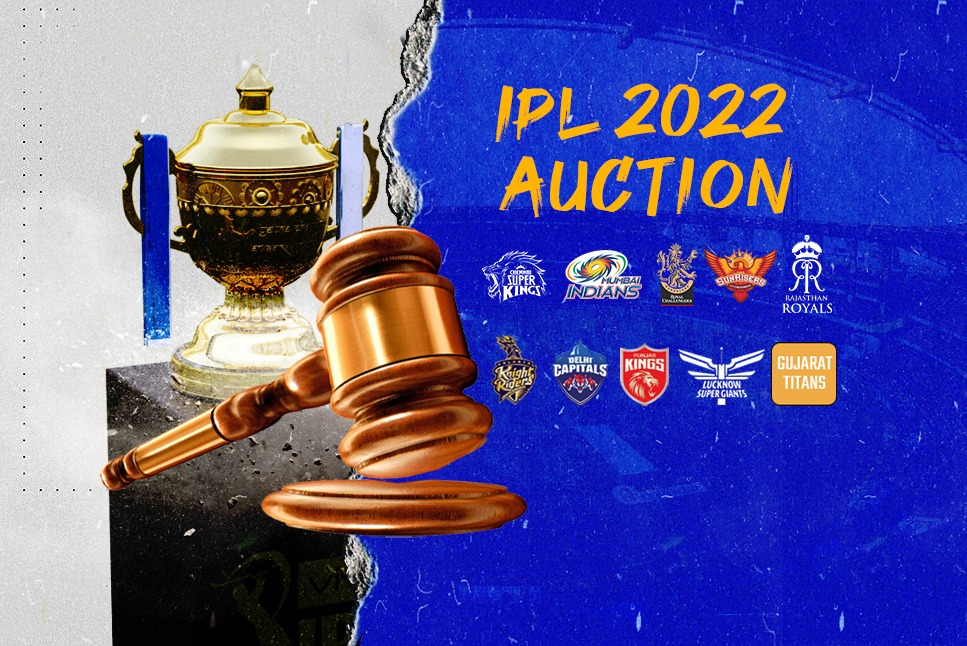

# Introduction

The IPL 2022 Mega Player auction have featured a total of 600 players who were set to go under the hammer in Bengaluru. The initial list had over 1000 cricketers who had registered for the auction. However, the final list was trimmed to 590. There was a total of 217 slots spread across ten franchises up for grabs. Among the 600 players, 229 are capped players, 371 are uncapped players.

In this project, we are going to see the  IPL 2022 Auction data analysis using Python. Around 10 teams are participated in this IPL 2022 Mega player Auction.

### Acknowledgements


The data was scrapped from news18.com/cricketnext

## Problem Statement:

Throughout this project, I will explore the IPL 2022 Auction data, clean the data and look at some interesting statistics and then try to find out some in sights.

## Data Set Characteristics:

Number of Observations in Data set : 633

Number of features : 8

## Feature Description :

|Feature | Data Type |Description |
|--------|-----------|------------|
|Index Number| Integer| Unique number|
|Player Name |  object | Name of the Player|
|Base Price  | object| Base Price  of the Player|
|Type | object | Type of the player  |
|COST IN ₹ (CR.)|  float64 |Total Cost in Cr Indian Rupees | 
|Cost IN $ (000)| float64 |Total Cost in USD |
|2021 Squad |object| Team of the Player in 2021|
|Team |object|Team of the Player in 2022|

# Import Dependecies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

## Display all the columns in a dataframe
pd.pandas.set_option('display.max_columns',None)

# import warning library
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [29]:
ipl_df = pd.read_csv('ipl_2022_dataset.csv')

In [30]:
ipl_df.head() # first 5 rows

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [31]:
ipl_df.tail() # last 5 rows

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
628,628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
632,632,Aaron Hardie,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold


In [32]:
ipl_df.shape

(633, 8)

In this Data Frame, there are 633 Observations and 8 Features.

In [33]:
ipl_df.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

**Droping the column Unnamed because it contain all unqiue values doesn't help for analysis**

In [34]:
ipl_df.drop('Unnamed: 0',axis =1, inplace=True)

In [35]:
ipl_df.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)',
       '2021 Squad', 'Team'],
      dtype='object')

## Exploration of the data

In [36]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 34.7+ KB


In [37]:
ipl_df.describe()

,COST IN ₹ (CR.),Cost IN $ (000)
count,237.000000,237.000000
mean,3.695781,480.451477
std,4.238092,550.951945
min,0.200000,26.000000
25%,0.400000,52.000000
50%,1.900000,247.000000
75%,6.500000,845.000000
max,17.000000,2210.000000


## Checking Missing values

In [38]:
ipl_df.isna().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

There are null values in 'COST IN ₹ (CR.)' & 'Cost IN $ (000) '

<AxesSubplot:>

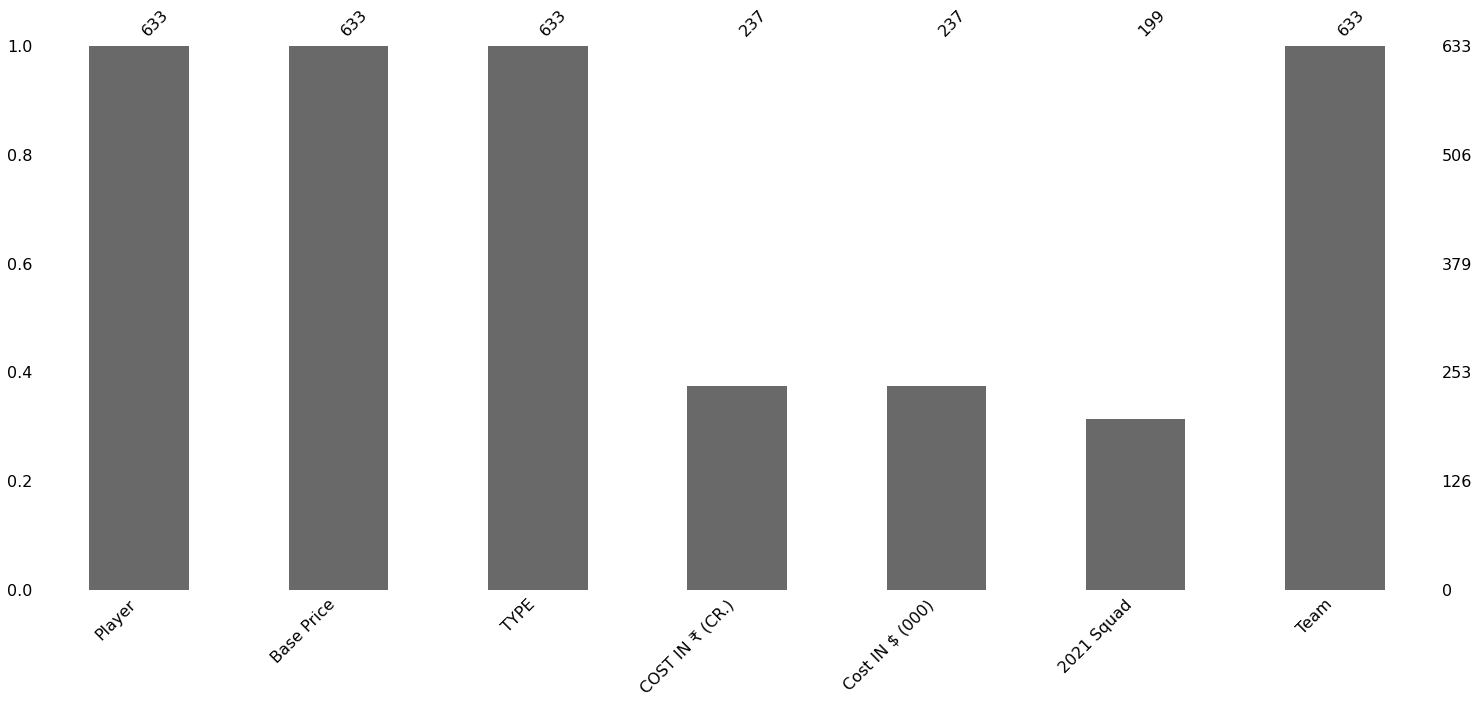

In [39]:
msno.bar(ipl_df)

## Dealing with Missing values

In [40]:
ipl_df[ipl_df['COST IN ₹ (CR.)'].isna()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


**These are the Players which went Unsold in 2022 Auctions so their Cost we can replace with ZERO**

In [41]:
ipl_df['COST IN ₹ (CR.)'] = ipl_df['COST IN ₹ (CR.)'].fillna(0)
ipl_df['Cost IN $ (000)'] = ipl_df['Cost IN $ (000)'].fillna(0)

In [42]:
ipl_df.isna().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)      0
Cost IN $ (000)      0
2021 Squad         434
Team                 0
dtype: int64

In [43]:
ipl_df[ipl_df['2021 Squad'].isna()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


**These are the Players who either went Unsold in 2021 IPL or participating for the first time in IPL2022. Then we can replace Null values as Not Participated in IPL 2022**

In [44]:
ipl_df['2021 Squad'] = ipl_df['2021 Squad'].fillna(' Not Participated in IPL 2021')

In [45]:
ipl_df.isna().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

### Checking the Duplicates in Data Frame

In [46]:
ipl_df[ipl_df.duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.0,0.0,Not Participated in IPL 2021,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.0,0.0,Not Participated in IPL 2021,Unsold


There is only one Duplicated Value

In [47]:
# Removing the duplicated value from DF
ipl_df.drop_duplicates(inplace=True)

### Adjusting some features

In [48]:
ipl_df['Team'].unique()

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Unsold'], dtype=object)

In [49]:
teams = ipl_df[ipl_df['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [50]:
ipl_df['status'] = ipl_df['Team'].replace(teams,'sold')

In [51]:
ipl_df.head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold


In [52]:
ipl_df['Base Price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

### Adding a New feature ***Retention***

This feature tells weather a player is picked by retention or in Auction

In [53]:
ipl_df['retention'] = ipl_df['Base Price']

In [54]:
ipl_df['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh','1.5 Cr'],'In Auction', inplace = True)

In [55]:
ipl_df.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick


### Dealing with Base Price feature

In [56]:
ipl_df['Base Price'].replace('Draft Pick',0, inplace = True)

In [57]:
ipl_df['base_price'] = ipl_df['Base Price'].apply(lambda x: str(x).split(' ')[0])
ipl_df['base_price_unit'] = ipl_df['Base Price'].apply(lambda x: str(x).split(' ')[-1])

In [58]:
ipl_df.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price,base_price_unit
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction,2,Cr
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction,40,Lakh
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0


In [59]:
ipl_df['base_price'].unique()

array(['0', '2', '40', '20', '1', '75', '50', '30', 'Retained', '1.5'],
      dtype=object)

In [60]:
ipl_df['base_price'].replace('Retained',0,inplace=True)

In [61]:
ipl_df['base_price_unit'].unique()

array(['0', 'Cr', 'Lakh', 'Retained'], dtype=object)

In [62]:
ipl_df['base_price_unit'] = ipl_df['base_price_unit'].replace({'Cr':100,'Lakh':1,'Retained':0})

In [63]:
ipl_df['base_price'] = ipl_df['base_price'].astype(float)
ipl_df['base_price_unit'] = ipl_df['base_price_unit'].astype(int)

In [64]:
ipl_df['Base_price(In Lakhs)'] = ipl_df['base_price']*ipl_df['base_price_unit']

In [65]:
ipl_df.drop(['Base Price','base_price_unit','base_price'], axis =1, inplace = True)

In [66]:
ipl_df.head()

,Player,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,Base_price(In Lakhs)
0,Rashid Khan,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0.0
1,Hardik Pandya,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0.0
2,Lockie Ferguson,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction,200.0
3,Rahul Tewatia,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction,40.0
4,Shubman Gill,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0.0


In [67]:
# Converting crores to Lakhs
ipl_df['COST IN ₹ (CR.)'] = ipl_df['COST IN ₹ (CR.)']*100

In [68]:
# Renaming the feature names
ipl_df = ipl_df.rename(columns={'TYPE':'Type','COST IN ₹ (CR.)':'Sold_for_lakh','Cost IN $ (000)':'Cost_in_dollars','2021 Squad':'Prev_team','Team':'Curr_team'})

In [69]:
ipl_df.head()

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,Base_price(In Lakhs)
0,Rashid Khan,BOWLER,1500.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0.0
1,Hardik Pandya,ALL-ROUNDER,1500.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0.0
2,Lockie Ferguson,BOWLER,1000.0,1300.0,KKR,Gujarat Titans,sold,In Auction,200.0
3,Rahul Tewatia,ALL-ROUNDER,900.0,1170.0,RR,Gujarat Titans,sold,In Auction,40.0
4,Shubman Gill,BATTER,800.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0.0


### Converting the cleaned Data Frame to CSV file

In [94]:
ipl_df.to_csv("IPL2022_Auction(CleanedData).csv",index=False)

### Now the data is ready for the analysis

**Now I have a list of Questions asked and I will be tring to answer those questions below.**

### 1. How many players participated in the Auction 2022 ?

In [70]:
ipl_df.shape[0]

632

There wre 632 Players appeared for TATA IPL 2022

### 2. Participation based on the Role(Batsman, Bowlers, Allrounders and WK)

In [71]:
types = ipl_df['Type'].value_counts().reset_index()
types

,index,Type
0,ALL-ROUNDER,241
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


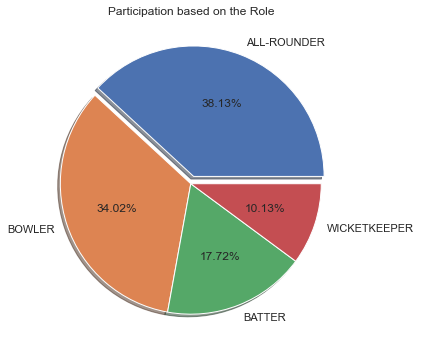

In [72]:
sns.set_style('darkgrid') # setting the figure style
sns.set(rc={'figure.figsize':(8,6)}) # setting the figure size

plt.pie(ipl_df['Type'].value_counts(), labels=ipl_df['Type'].value_counts().index,autopct = '%1.2f%%',shadow=True,explode=[0.06,0,0,0])
plt.title('Participation based on the Role')
plt.show()

### 3. How many Players Were Sold in IPL 2022 Auctions ?

In [73]:
sold_players = ipl_df['status'].value_counts().reset_index()
sold_players

,index,status
0,Unsold,395
1,sold,237


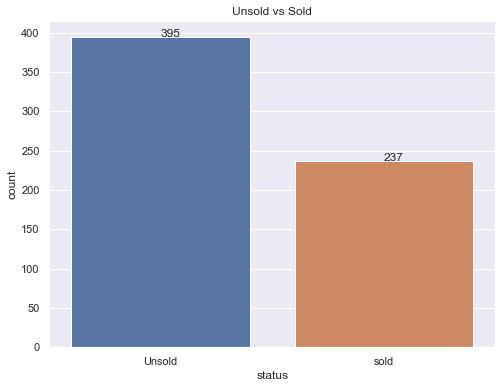

In [74]:
sns.countplot(ipl_df['status'],order=['Unsold','sold']).set_title("Unsold vs Sold")

for i,df in enumerate(ipl_df['status'].value_counts()):
    plt.text(i,df,str(df))

In Auction 237 were Sold and 395 were Unsold.

### 4. How many Players Brought by Each Team

In [75]:
players = ipl_df[ipl_df['Curr_team']!= 'Unsold']['Curr_team'].value_counts()
players

Chennai Super Kings            25
Kolkata Knight Riders          25
Punjab Kings                   25
Mumbai Indians                 25
Delhi Capitals                 24
Rajasthan Royals               24
Sunrisers Hyderabad            23
Gujarat Titans                 22
Lucknow Super Giants           22
Royal Challengers Bangalore    22
Name: Curr_team, dtype: int64

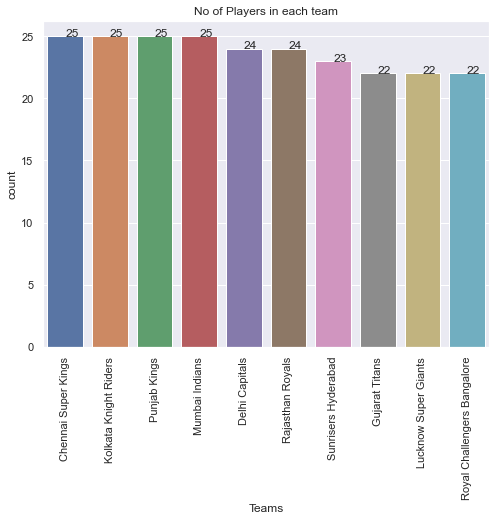

In [76]:
sns.countplot(x = ipl_df[ipl_df['Curr_team']!= 'Unsold']['Curr_team'],order = players.index).set_title("No of Players in each team")
plt.xlabel("Teams")
plt.xticks(rotation = 90)


for i,df in enumerate(ipl_df[ipl_df['Curr_team']!= 'Unsold']['Curr_team'].value_counts()):
    plt.text(i,df,str(df))

### 5. How many players Retained/DraftPicked by Each team ?

In [77]:
players_retained = ipl_df.groupby(['Curr_team','retention'])['Player'].count()[:-1]
players_retained

Curr_team                    retention 
Chennai Super Kings          In Auction    21
                             Retained       4
Delhi Capitals               In Auction    20
                             Retained       4
Gujarat Titans               Draft Pick     3
                             In Auction    19
Kolkata Knight Riders        In Auction    21
                             Retained       4
Lucknow Super Giants         Draft Pick     3
                             In Auction    19
Mumbai Indians               In Auction    21
                             Retained       4
Punjab Kings                 In Auction    23
                             Retained       2
Rajasthan Royals             In Auction    21
                             Retained       3
Royal Challengers Bangalore  In Auction    19
                             Retained       3
Sunrisers Hyderabad          In Auction    20
                             Retained       3
Name: Player, dtype: int64

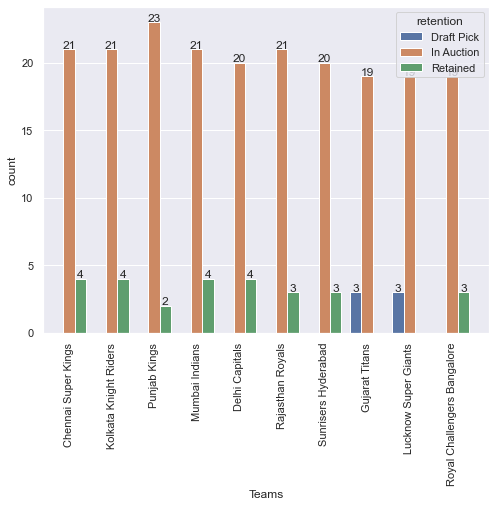

In [78]:
fig = sns.countplot( ipl_df[ipl_df['Curr_team']!= 'Unsold']['Curr_team'],hue =ipl_df['retention'],order =players.index)
plt.xlabel("Teams")
plt.xticks(rotation = 90)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')

### 5. How many Players were Bought for each Role

In [79]:
ipl_df.groupby(['Type','status'])['Player'].count().reset_index()

,Type,status,Player
0,ALL-ROUNDER,Unsold,153
1,ALL-ROUNDER,sold,88
2,BATTER,Unsold,67
3,BATTER,sold,45
4,BOWLER,Unsold,138
5,BOWLER,sold,77
6,WICKETKEEPER,Unsold,37
7,WICKETKEEPER,sold,27


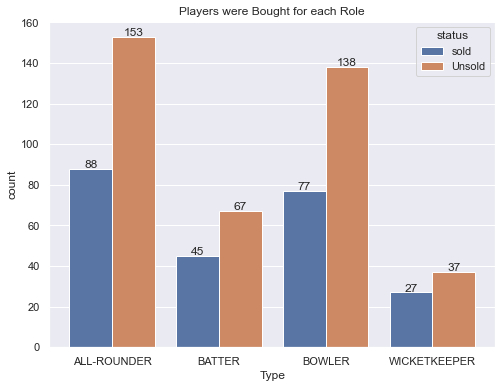

In [80]:
fig = sns.countplot(ipl_df['Type'],hue = ipl_df['status'],order=['ALL-ROUNDER','BATTER','BOWLER','WICKETKEEPER'])
plt.title("Players were Bought for each Role")
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')

### 6. Which Are the players who participated in IPL 2021 and will be participating in IPL 2022 and playing in same team

In [81]:
ipl_df.replace({'SRH':'Sunrisers Hyderabad','CSK':'Chennai Super Kings','MI':'Mumbai Indians','KKR':'Kolkata Knight Riders','RR':'Rajasthan Royals','PBKS':'Punjab Kings','DC':'Delhi Capitals','RCB':'Royal Challengers Bangalore'},inplace =True)

In [82]:
same_team = ipl_df[(ipl_df['Curr_team'] == ipl_df['Prev_team']) & (ipl_df['retention']=='In Auction')]
same_team

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,Base_price(In Lakhs)
23,Deepak Chahar,BOWLER,1400.0,1820.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
26,Ambati Rayudu,WICKETKEEPER,675.0,877.5,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
28,Dwayne Bravo,ALL-ROUNDER,440.0,572.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
31,Robin Uthappa,BATTER,200.0,260.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
32,Mitchell Santner,ALL-ROUNDER,190.0,247.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,100.0
39,K.Bhagath Varma,ALL-ROUNDER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
41,N. Jagadeesan,WICKETKEEPER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
42,C.Hari Nishaanth,BATTER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
43,K.M. Asif,BOWLER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
62,Lalit Yadav,ALL-ROUNDER,65.0,84.5,Delhi Capitals,Delhi Capitals,sold,In Auction,20.0


**Let's Visualize this team wise**

In [83]:
p = same_team['Curr_team'].value_counts()
p

Chennai Super Kings            9
Royal Challengers Bangalore    6
Kolkata Knight Riders          5
Punjab Kings                   5
Sunrisers Hyderabad            5
Delhi Capitals                 3
Mumbai Indians                 3
Rajasthan Royals               3
Name: Curr_team, dtype: int64

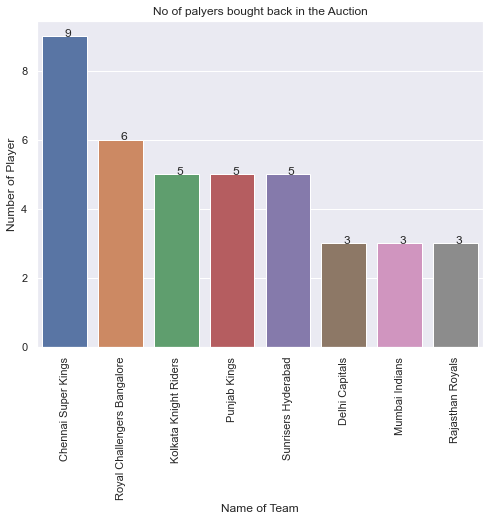

In [84]:
sns.countplot(same_team['Curr_team'],order=p.index).set_title("No of palyers bought back in the Auction")
plt.xlabel('Name of Team')
plt.ylabel('Number of Player')
plt.xticks(rotation = 90)
# plt.show()

for i,df in enumerate(same_team['Curr_team'].value_counts()):
    plt.text(i,df,str(df))

### 7. Number of players in each team based on thier roles

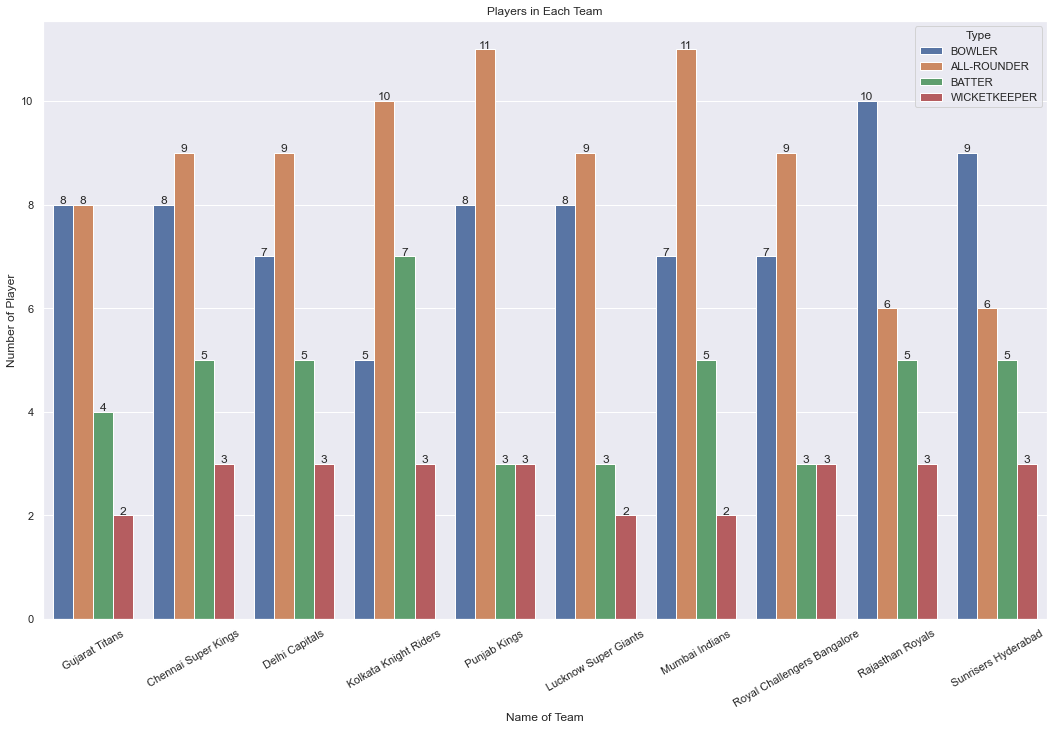

In [85]:
plt.figure(figsize=(18,11))
fig = sns.countplot(ipl_df[ipl_df['Curr_team']!='Unsold']['Curr_team'],hue=ipl_df['Type'])
plt.title('Players in Each Team')
plt.xlabel('Name of Team')
plt.ylabel('Number of Player')


plt.xticks(rotation = 30)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')

### 8. Heighest Bid(successful ) by each team

In [87]:
ipl_df[ipl_df['retention']=='In Auction'].groupby(['Curr_team'])['Sold_for_lakh'].max()[:-1].sort_values(ascending = False)

Curr_team
Mumbai Indians                 1525.0
Chennai Super Kings            1400.0
Kolkata Knight Riders          1225.0
Punjab Kings                   1150.0
Delhi Capitals                 1075.0
Royal Challengers Bangalore    1075.0
Sunrisers Hyderabad            1075.0
Gujarat Titans                 1000.0
Lucknow Super Giants           1000.0
Rajasthan Royals               1000.0
Name: Sold_for_lakh, dtype: float64

### 9. Top Five Batsman picked from Auction

In [88]:
ipl_df[(ipl_df['retention']=='In Auction') & (ipl_df['Type']=='BATTER')].sort_values(by='Sold_for_lakh', ascending = False).head(5)

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,Base_price(In Lakhs)
71,Shreyas Iyer,BATTER,1225.0,1592.5,Delhi Capitals,Kolkata Knight Riders,sold,In Auction,200.0
193,Shimron Hetmyer,BATTER,850.0,1105.0,Delhi Capitals,Rajasthan Royals,sold,In Auction,150.0
217,Rahul Tripathi,BATTER,850.0,1105.0,Kolkata Knight Riders,Sunrisers Hyderabad,sold,In Auction,40.0
100,Shikhar Dhawan,BATTER,825.0,1072.5,Delhi Capitals,Punjab Kings,sold,In Auction,200.0
195,Devdutt Padikkal,BATTER,775.0,1007.5,Royal Challengers Bangalore,Rajasthan Royals,sold,In Auction,200.0


### 10. Heighest Paid Retained player

In [89]:
ipl_df[(ipl_df['retention'] == 'Retained')].sort_values(by='Sold_for_lakh', ascending = False).head(5)

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,Base_price(In Lakhs)
22,Ravindra Jadeja,ALL-ROUNDER,1600.0,2080.0,Chennai Super Kings,Chennai Super Kings,sold,Retained,0.0
47,Rishabh Pant,WICKETKEEPER,1600.0,2080.0,Delhi Capitals,Delhi Capitals,sold,Retained,0.0
143,Rohit Sharma,BATTER,1600.0,2080.0,Mumbai Indians,Mumbai Indians,sold,Retained,0.0
168,Virat Kohli,BATTER,1500.0,1950.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,Retained,0.0
214,Kane Williamson,BATTER,1400.0,1820.0,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,Retained,0.0


### 11. Amount Spent by each team in Auction

In [90]:
team_auction = ipl_df[(ipl_df['retention']=='In Auction')].groupby('Curr_team')['Sold_for_lakh'].sum()[:-1].sort_values(ascending = False)
team_auction = team_auction.reset_index()
team_auction

,Curr_team,Sold_for_lakh
0,Punjab Kings,6855.0
1,Sunrisers Hyderabad,6790.0
2,Rajasthan Royals,6105.0
3,Lucknow Super Giants,5920.0
4,Royal Challengers Bangalore,5545.0
5,Gujarat Titans,5165.0
6,Mumbai Indians,4790.0
7,Kolkata Knight Riders,4755.0
8,Delhi Capitals,4740.0
9,Chennai Super Kings,4505.0


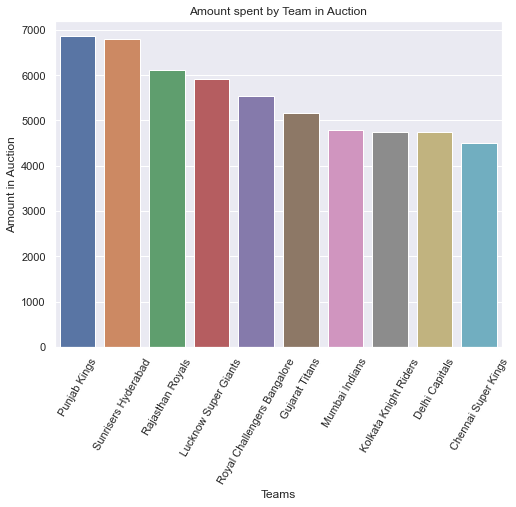

In [91]:
sns.barplot(team_auction['Curr_team'], team_auction['Sold_for_lakh']).set_title("Amount spent by Team in Auction")
plt.xticks(rotation=60)
plt.xlabel("Teams")
plt.ylabel("Amount in Auction")
plt.show()


### 12. List of players who Played IPL 2021 but went unsold this time

In [93]:
ipl_df[(ipl_df['Prev_team']!=' Not Participated in IPL 2021') & (ipl_df['Curr_team']=='Unsold')][['Player','Prev_team','Curr_team']]

,Player,Prev_team,Curr_team
237,Suresh Raina,Chennai Super Kings,Unsold
238,Steve Smith,Delhi Capitals,Unsold
239,Shakib Al Hasan,Kolkata Knight Riders,Unsold
240,Amit Mishra,Delhi Capitals,Unsold
241,Adil Rashid,Punjab Kings,Unsold
242,Imran Tahir,Chennai Super Kings,Unsold
243,Mujeeb Zadran,Sunrisers Hyderabad,Unsold
244,Adam Zampa,Royal Challengers Bangalore,Unsold
245,Rajat Patidar,Royal Challengers Bangalore,Unsold
246,Mohammed Azharuddeen,Royal Challengers Bangalore,Unsold


## Thank you for making it to end of this notebook !